# MLP Test 1

Exploração e resumo sobre **_Multi-Layer Perceptron_** com base na documentação do [scikit-learn](https://scikit-learn.org/stable/modules/neural_networks_supervised.html).

## Multi-layer Perceptron

Possui esse nome por consistir de multiplas camadas de **Perceptron**.

![Exemplo de Multi-layer Perceptron](https://scikit-learn.org/stable/_images/multilayerperceptron_network.png)

Com base na imagem, destacam-se 3 partes principais:

- _input layer_: contendo os dados de entrada;

- _hidden layer_: contendo até multiplas camadas de Perceptrons, responsáveis pelo processamento dos dados de entrada;

- _output layer_: responsáveis por receberem os dados processados e com isso gerar o dado de saída.

O módulo contém atributos públicos `coefs_` e `intercepts_`:

- `coefs_` é uma lista com as matrizes de peso, onde a matriz de índice _i_ representa os pesos entre as camadas _i_ e _i + 1_;

- `intercepts_` é uma lista com vetores de _bias_ de cada neurônio, onde o vetor no ìndice _i_ contém os _bias_ da camada _i + 1_.

### Vantagens

- Capacidade de aprender modelos não lineares.
- Capacidade de aprender modelos em tempo real usando `partial_fit` (método).

### Desvantagens

- Possui uma função de perda não-convexa com mais de um mínimo local, então, diferentes pesos aleatórios de inicialização podem levar a diferentes acurácias de validação.
- Requer o ajuste de vários hiperparâmetros.
- É sensível a escala das features.

## Classificação

A Classe `MLPClassifier` implementa **MLP** com treino usando o algoritmo _Backpropagation_.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [2]:
# Carregando dataset
iris_dataset = load_iris()
X, y = load_iris(return_X_y=True)

# Separando dados
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

# Preprocessando dados
sc = StandardScaler().fit(X_train)

X_train_prepro = sc.transform(X_train)

X_test_prepro = sc.transform(X_test)

In [3]:
# Dados de treino puros
pd.DataFrame(data=X_train, columns=iris_dataset.feature_names).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,105.000000,105.000000,105.000000,105.000000
mean,5.800000,3.038095,3.738095,1.190476
std,0.844553,0.418877,1.788660,0.783057
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.600000,0.200000
50%,5.800000,3.000000,4.200000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.700000,4.400000,6.900000,2.500000


In [4]:
# Dados de treino após pré-processamento
pd.DataFrame(data=X_train_prepro, columns=iris_dataset.feature_names).describe() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.050000e+02,1.050000e+02,1.050000e+02,1.050000e+02
mean,-8.479989e-16,-1.833454e-15,-8.458842e-18,-6.005778e-16
std,1.004796e+00,1.004796e+00,1.004796e+00,1.004796e+00
min,-1.784607e+00,-2.490169e+00,-1.538150e+00,-1.399268e+00
25%,-9.517902e-01,-5.711396e-01,-1.201095e+00,-1.270951e+00
50%,-1.056699e-15,-9.138233e-02,2.594793e-01,1.405379e-01
75%,7.138426e-01,6.282535e-01,7.650626e-01,7.821238e-01
max,2.260502e+00,3.266918e+00,1.776229e+00,1.680344e+00


In [5]:
MLPClassifier?

Init signature:
MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    power_t=0.5,
    max_iter=200,
    shuffle=True,
    random_state=None,
    tol=0.0001,
    verbose=False,
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    n_iter_no_change=10,
    max_fun=15000,
)
Docstring:     
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'id

classes: [0 1 2]
              precision    recall  f1-score   support

      setosa       0.36      0.71      0.48        14
  versicolor       0.00      0.00      0.00        18
   virginica       0.12      0.15      0.13        13

    accuracy                           0.27        45
   macro avg       0.16      0.29      0.20        45
weighted avg       0.15      0.27      0.19        45



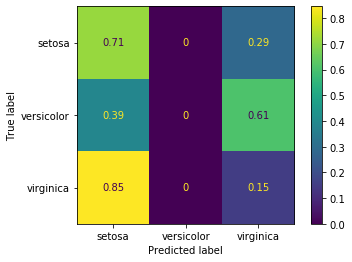

In [11]:
# Instanciando classificador
classifier = MLPClassifier(
    hidden_layer_sizes=(4, 4),
    random_state=1
).fit(X_train_prepro, y_train)

y1_pred = classifier.predict(X_test_prepro)

print(f'classes: {classifier.classes_}')

print(classification_report(
    y_true=y_test,
    y_pred=y1_pred,
    target_names=iris_dataset.target_names
))

plot_confusion_matrix(
    estimator=classifier,
    X=X_test_prepro,
    y_true=y_test,
    display_labels=iris_dataset.target_names,
    normalize='true'
)

classes: [0 1 2]
              precision    recall  f1-score   support

      setosa       0.00      0.00      0.00        14
  versicolor       0.58      0.83      0.68        18
   virginica       0.68      1.00      0.81        13

    accuracy                           0.62        45
   macro avg       0.42      0.61      0.50        45
weighted avg       0.43      0.62      0.51        45



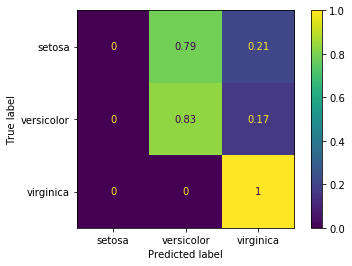

In [7]:
# Instanciando classificador
classifier = MLPClassifier(
    hidden_layer_sizes=(4, 4, 4),
    random_state=1
).fit(X_train_prepro, y_train)

y2_pred = classifier.predict(X_test_prepro)

print(f'classes: {classifier.classes_}')

print(classification_report(
    y_true=y_test,
    y_pred=y2_pred,
    target_names=iris_dataset.target_names
))

plot_confusion_matrix(
    estimator=classifier,
    X=X_test_prepro,
    y_true=y_test,
    display_labels=iris_dataset.target_names,
    normalize='true'
)

classes: [0 1 2]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.67      0.33      0.44        18
   virginica       0.45      0.77      0.57        13

    accuracy                           0.67        45
   macro avg       0.71      0.70      0.67        45
weighted avg       0.71      0.67      0.65        45



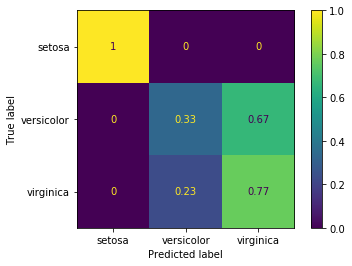

In [8]:
# Instanciando classificador
classifier = MLPClassifier(
    hidden_layer_sizes=(20),
    random_state=1
).fit(X_train_prepro, y_train)

y3_pred = classifier.predict(X_test_prepro)

print(f'classes: {classifier.classes_}')

print(classification_report(
    y_true=y_test,
    y_pred=y3_pred,
    target_names=iris_dataset.target_names
))

plot_confusion_matrix(
    estimator=classifier,
    X=X_test_prepro,
    y_true=y_test,
    display_labels=iris_dataset.target_names,
    normalize='true'
)

classes: [0 1 2]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      0.94      0.94        18
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



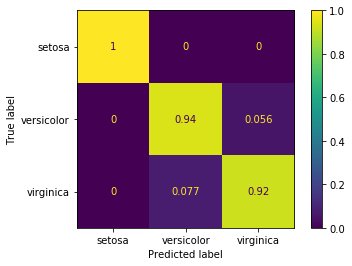

In [9]:
# Instanciando classificador
classifier = MLPClassifier(
    hidden_layer_sizes=(50, 50),
    random_state=1
).fit(X_train_prepro, y_train)

y4_pred = classifier.predict(X_test_prepro)

print(f'classes: {classifier.classes_}')

print(classification_report(
    y_true=y_test,
    y_pred=y4_pred,
    target_names=iris_dataset.target_names
))

plot_confusion_matrix(
    estimator=classifier,
    X=X_test_prepro,
    y_true=y_test,
    display_labels=iris_dataset.target_names,
    normalize='true'
)

classes: [0 1 2]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      0.94      0.94        18
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



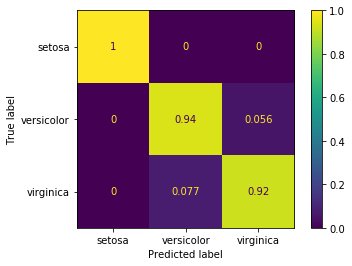

In [10]:
# Instanciando classificador
classifier = MLPClassifier(
    hidden_layer_sizes=(100, 100),
    random_state=1
).fit(X_train_prepro, y_train)

y5_pred = classifier.predict(X_test_prepro)

print(f'classes: {classifier.classes_}')

print(classification_report(
    y_true=y_test,
    y_pred=y5_pred,
    target_names=iris_dataset.target_names
))

plot_confusion_matrix(
    estimator=classifier,
    X=X_test_prepro,
    y_true=y_test,
    display_labels=iris_dataset.target_names,
    normalize='true'
)